In [211]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import itertools
import os
from root_numpy import root2array, root2rec, tree2array, array2root
%matplotlib inline

In [219]:
#f_tll = TFile("ana.root","READ")

f = ROOT.TFile('calib_ana150.root')
t = f.Get('tree')
df = pd.DataFrame(tree2array(t)) #,branches=['_pi0_energy','_clus_nhits_v','_clus_vtxdist_v','_clus_plane_v']))


In [220]:
df.head()
#df[(df['_pl'] == 2)]

,_pl,_wire,_chan,_reco_area,_reco_ampl,_q,_tick
0,1,1254,3654,43.673874,4.796547,10665.960129,3211
1,1,1255,3655,55.211418,5.049825,9846.800903,3212
2,1,1271,3671,74.143082,6.441461,17220.665693,2906
3,1,1272,3672,74.874283,5.717398,13960.751244,2904
4,1,1273,3673,37.007980,4.045473,10363.071884,2903


In [221]:
true_q = [ df['_q'][i] for i in xrange(df['_q'].shape[0]) ]
reco_q = [ df['_reco_area'][i] for i in xrange(df['_reco_area'].shape[0]) ]

gain_v = [ true_q[i] / reco_q[i] for i in xrange(len(true_q)) if df['_pl'][i]== 2 ]

chan_v = [df['_chan'][i] for i in xrange(df['_chan'].shape[0]) if df['_pl'][i]==2]

tick_v = [df['_tick'][i] for i in xrange(df['_tick'].shape[0]) if df['_pl'][i]==2]


print len(reco_q), len(true_q)

34418 34418


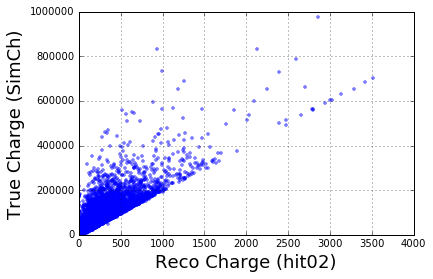

In [222]:
plt.figure()
plt.plot(reco_q,true_q,'b.',alpha=0.5)#,label='showers')
plt.grid(True)
plt.xlabel("Reco Charge (hit02)",fontsize=18)
plt.ylabel("True Charge (SimCh)",fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


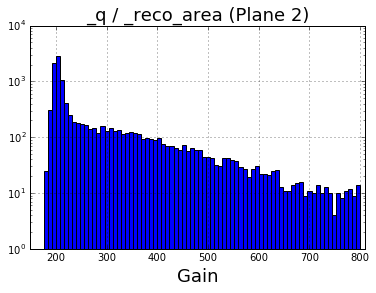

In [226]:
plt.figure()
plt.hist(gain_v,100,range=[0,800])#,'b.',alpha=0.5)#,label='showers')
plt.grid(True)
plt.title('_q / _reco_area (Plane 2)',fontsize=18 )
plt.xlabel("Gain",fontsize=18)
plt.xlim(150,810)
plt.yscale('log')
#plt.ylabel("True Charge (SimCh)",fontsize=18)
#plt.ylim(0,1000)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

(0, 2000)

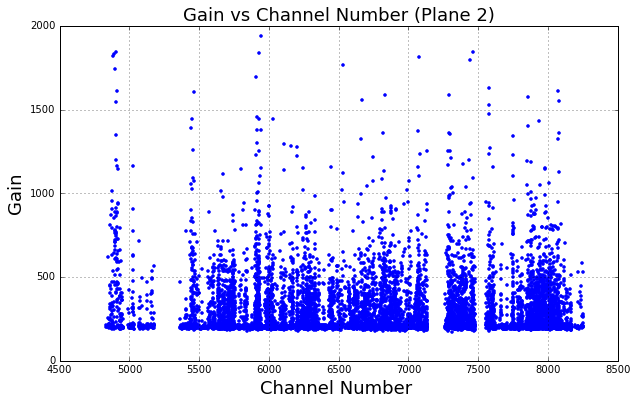

In [227]:
plt.figure(figsize=(10,6))
plt.plot(chan_v,gain_v,'b.') #,100,range=[0,800])#,'b.',alpha=0.5)#,label='showers')
plt.grid(True)
plt.title('Gain vs Channel Number (Plane 2)',fontsize=18 )
plt.xlabel("Channel Number ",fontsize=18)
#plt.xlim(7860,8040)
#plt.xlim(6500,7000)
#plt.yscale('log')
plt.ylabel("Gain",fontsize=18)
plt.ylim(0,2000)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

(0, 2000)

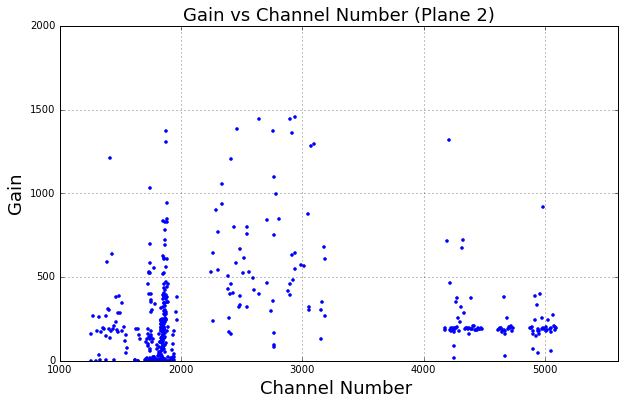

In [196]:
plt.figure(figsize=(10,6))
plt.plot(tick_v,gain_v,'b.') #,100,range=[0,800])#,'b.',alpha=0.5)#,label='showers')
plt.grid(True)
plt.title('Gain vs Channel Number (Plane 2)',fontsize=18 )
plt.xlabel("Channel Number ",fontsize=18)
plt.xlim(1000,5600)
#plt.yscale('log')
plt.ylabel("Gain",fontsize=18)
plt.ylim(0,2000)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))